Exploratory Data Analysis on the patient demographics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")
print(data[:10])

                     Patient  Weeks   FVC    Percent  Age   Sex SmokingStatus
0  ID00007637202177411956430     -4  2315  58.253649   79  Male     Ex-smoker
1  ID00007637202177411956430      5  2214  55.712129   79  Male     Ex-smoker
2  ID00007637202177411956430      7  2061  51.862104   79  Male     Ex-smoker
3  ID00007637202177411956430      9  2144  53.950679   79  Male     Ex-smoker
4  ID00007637202177411956430     11  2069  52.063412   79  Male     Ex-smoker
5  ID00007637202177411956430     17  2101  52.868646   79  Male     Ex-smoker
6  ID00007637202177411956430     29  2000  50.327126   79  Male     Ex-smoker
7  ID00007637202177411956430     41  2064  51.937594   79  Male     Ex-smoker
8  ID00007637202177411956430     57  2057  51.761449   79  Male     Ex-smoker
9  ID00009637202177434476278      8  3660  85.282878   69  Male     Ex-smoker


Outline of what each columns represent:  
Patient(str): unique ID for each patient  
Weeks(int): the relative number of weeks pre/post the baseline CT scan  
FVC(int): the recorded lung capacity in ml  
Percent(float): a computed field which approximates the patient's FVC as a percent of the typical FVC for a person of similar characteristics  
Age(int), Sex(str), SmokingStatus(str)

First, the rows are grouped by weeks, to attempt to identify trends in change in FVC and Percent over time.

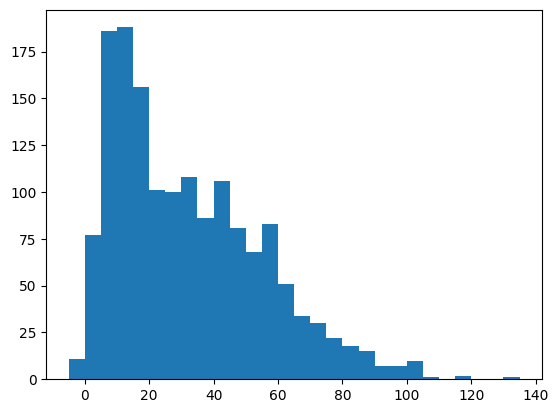

In [4]:
bin_width = 5
bins = np.arange(min(data["Weeks"]), max(data["Weeks"]) + bin_width, bin_width)

weeks_dist = plt.hist(data["Weeks"], bins=bins)

For now, FVC readings measured pre-CT scans are dropped, then readings are grouped by Weeks, at a 5-week interval.

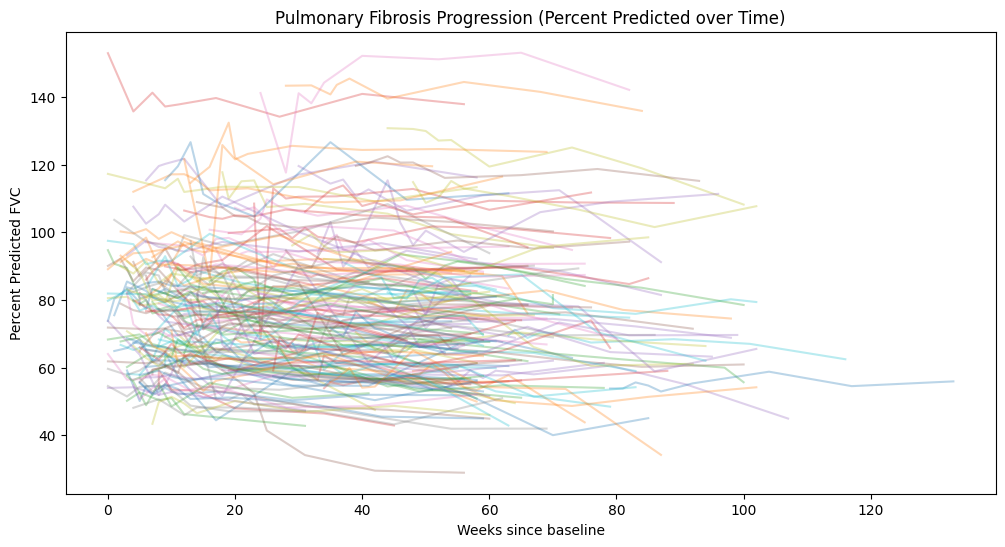

In [6]:
post_CT_data = data[data["Weeks"]>=0]
plt.figure(figsize=(12, 6))

for patient, pdata in post_CT_data.groupby("Patient"):
    plt.plot(pdata["Weeks"], pdata["Percent"], alpha=0.3)

plt.xlabel("Weeks since baseline")
plt.ylabel("Percent Predicted FVC")
plt.title("Pulmonary Fibrosis Progression (Percent Predicted over Time)")
plt.show()

Overall trend of decreasing percent values is observed. Now, effect of age is assessed, but there is a limitation: the readings are taken irregularly, so it is challenging to compute a metric that expresses change in FVC from week 30 to week 0. Instead, a percentage decline is computed then plotted.

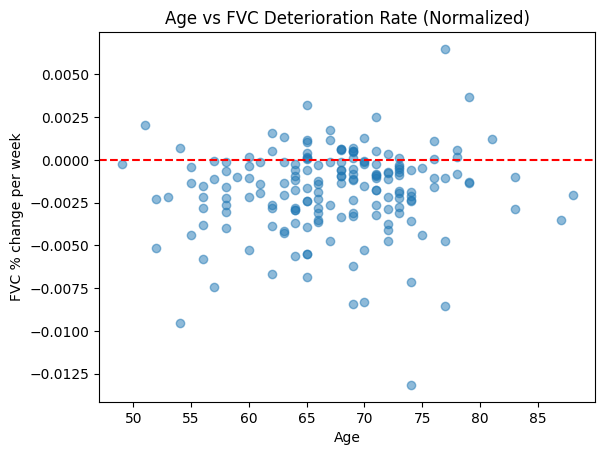

In [9]:
rates = []
ages = []

for patient, pdata in post_CT_data.groupby("Patient"):
    pdata = pdata.sort_values("Weeks")
    fvc_first = pdata["FVC"].iloc[0]
    fvc_last = pdata["FVC"].iloc[-1]
    t_first = pdata["Weeks"].iloc[0]
    t_last = pdata["Weeks"].iloc[-1]
    
    if t_last > t_first:  # avoid divide by zero
        decline_rate = (fvc_last - fvc_first) / (fvc_first * (t_last - t_first))
        rates.append(decline_rate)
        ages.append(pdata["Age"].iloc[0])

plt.scatter(ages, rates, alpha=0.5)
plt.xlabel("Age")
plt.ylabel("FVC % change per week")
plt.title("Age vs FVC Deterioration Rate (Normalized)")
plt.axhline(0, color="red", linestyle="--")
plt.show()

Not much correlation between age and relative FVC decline is shown in this plot.